In [74]:
import pandas as pd
from functools import reduce
from operator import add
from collections import defaultdict
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [60]:
natwest_2020 = pd.read_csv('natwest-2020.csv')

In [94]:
def bar_chart(labels, data, title):
    x = np.arange(len(labels))  # the label locations
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, data, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('GBP')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)

    fig.tight_layout()
    plt.rcParams["figure.figsize"] = (20,10)

    plt.show()

In [99]:
def group_by_top_merchant(natwest):
    """natwest = pd.read_csv('natwest-2020.csv') of natwest data"""
    sorted_paid = group_by_merchant(natwest)
    bar_chart([x[0] for x in sorted_paid[:20]], [int(-1 * x[1]) for x in sorted_paid[:20]], 'GBP spent by merchant')

def group_by_merchant(natwest):
    """natwest = pd.read_csv('natwest-2020.csv') of natwest data"""
    tokens = reduce(add, map(lambda x: x.split(' '), list(natwest[' Type'])))
    tokens = set(tokens)
    paid = defaultdict(int)
    for index, row in natwest.iterrows():
        for token in tokens:
            if token in row[' Type']:
                paid[token] += float(row[' Description'])
    sorted_paid = [*filter(lambda x: len(''.join([i for i in x[0] if not i.isdigit()])) > 4, sorted([(k, v) for k, v in paid.items()], key=lambda x: x[1]))]
    return sorted_paid

In [100]:
group_by_merchant(natwest_2020)

[('LONDON', -32098.56000000011),
 ('VANGUARD', -20000.0),
 ("'HORTON", -14575.0),
 ('GARTON', -14575.0),
 ('DELIVEROO', -6347.999999999991),
 ('DELIVEROO.CO.UK', -6182.659999999991),
 ('VRATE', -4939.780000000002),
 ('MONTH', -4023.4599999999996),
 ('ONLINE', -3384.16),
 ('AMAZON', -2161.4199999999996),
 ('AMAZON.CO', -2065.54),
 ('AMAZON.CO.U', -2064.6600000000003),
 ('AMAZON.CO.UK', -2021.7800000000004),
 ('HOTEL', -1653.8899999999999),
 ('AMZNMKTPLACE', -1445.52),
 ("'HOMESHIFT", -1002.7299999999999),
 ('BRITISH', -884.98),
 ('SHANGRI-LA', -737.13),
 ('TARGU', -677.7900000000001),
 ('RIOMAGGIORE', -659.96),
 ('HELP.UBER.C', -624.61),
 ('HELP.UBER.CO', -606.28),
 ('BOOTS', -571.29),
 ('REWARDSCHEME', -552.0),
 ("'BOOTS", -552.0),
 ('HELP.UBER.COM', -508.16),
 ('REVOLUT', -500.0),
 ('AMSTERDAM', -433.57),
 ('MONTECATINI', -388.22999999999996),
 ('GOOGLE', -360.5),
 ('MEDIA', -342.0),
 ('PYMTS', -342.0),
 ("'VIRGIN", -342.0),
 ('DUXI,', -331.85),
 ('SMITH', -330.04999999999995),
 ('CAM

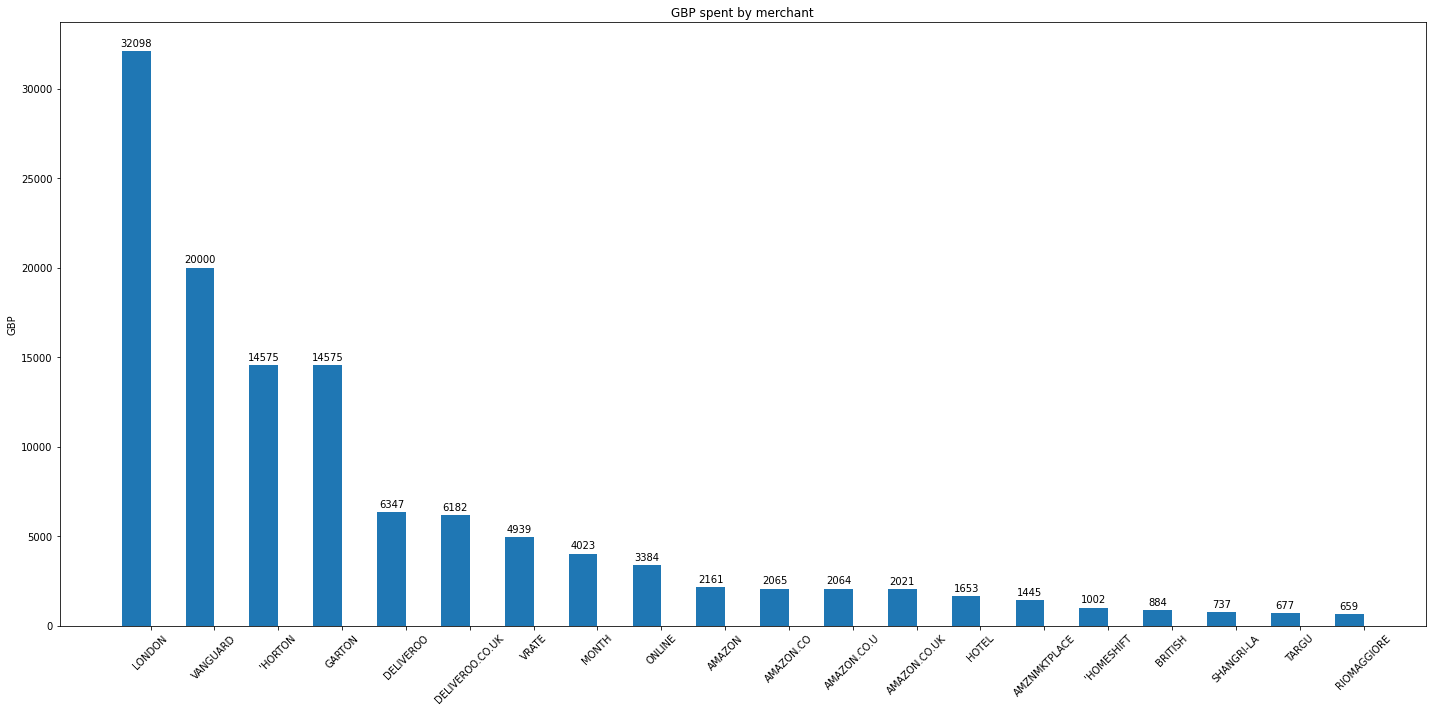

In [101]:
group_by_top_merchant(natwest_2020)

In [124]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(natwest[natwest.duplicated(subset=[' Type'])].groupby(' Type').sum().sort_values(by=' Description'))

,Description,Value,Account Number
Type,,,
'HOMESHIFT,-814.73,75990.65,0.0
'BOOTS REWARDSCHEME,-506.00,87215.21,0.0
'VIRGIN MEDIA PYMTS,-228.00,57724.95,0.0
'ALESSANDRO,-150.00,24593.45,0.0
"'6203 04APR20 , NISA LOCAL , LONDON GB",-108.99,18849.72,0.0
"'6203 18AUG20 , BRITISH A , 0052112381 , LONDON GB , EUR 68.16, VRATE 1.1025, N-S TRN FEE 1.70",-63.52,6624.20,0.0
"'6203 26JUN20 , DELIVEROO.CO.UK , LONDON GB",-62.24,9446.38,0.0
"'4281 24NOV20 D , DELIVEROO.CO.UK , LONDON GB",-54.44,295.53,0.0
"'6203 19JAN20 , BRITISH MUSEUM , LONDON GB",-48.96,8571.00,0.0


In [126]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(natwest[natwest.duplicated(subset=[' Description'])].groupby(' Type').sum().sort_values(by=' Type'))

,Description,Value,Account Number
Type,,,
"'4281 11OCT20 CD , GAILS - EXMOUTH , MARKET , LONDON GB",-2.80,12377.16,0.0
"'5773 01FEB20 CD , MERCATO , METROPOLITANO , LONDON GB",-18.00,5010.87,0.0
"'5773 01FEB20 CD , NINTH WARD , LONDON GB",-2.50,4989.61,0.0
"'5773 01FEB20 CD , TFL TRAVEL CH , TFL.GOV.UK/CP GB",-3.90,4985.71,0.0
"'5773 02FEB20 CD , NINTH WARD , LONDON GB",-2.60,4983.11,0.0
"'5773 02FEB20 CD , TFL TRAVEL CH , TFL.GOV.UK/CP GB",-1.50,5154.29,0.0
"'5773 03FEB20 CD , YIFANG FRUIT TEA , LONDON GB",-4.65,4843.06,0.0
"'5773 03MAR20 CD , PRINCI , LONDON GB",-18.00,4595.96,0.0
"'5773 03MAR20 CD , TFL TRAVEL CH , TFL.GOV.UK/CP GB",-2.40,4571.70,0.0


In [144]:
def recurrent(natwest):
    """natwest = pd.read_csv('natwest-2020.csv') of natwest data"""
    tokens = reduce(add, map(lambda x: x.split(' '), list(natwest[' Type'])))
    tokens = set(tokens)
    recurrent_paid = defaultdict(int)
    for index, row in natwest.iterrows():
        for token in tokens:
            if len(''.join([i for i in token if not i.isdigit()])) > 4 and token in row[' Type']:
                type_des = "you paid " + str(-1 * row[' Description']) + "GBP for " + token
                recurrent_paid[type_des] += 1
    recurrent_paid = {k: v for k, v in sorted(recurrent_paid.items(), key=lambda item: item[1], reverse=True)}
    for k, v in recurrent_paid.items():
        print("For {} times {}".format(v, k))

In [145]:
recurrent(natwest_2020)

For 15 times you paid 3.9GBP for TFL.GOV.UK/CP
For 15 times you paid 3.9GBP for TRAVEL
For 13 times you paid 7.99GBP for AMAZON
For 12 times you paid 9.99GBP for SPOTIFY
For 12 times you paid 9.99GBP for LONDON
For 12 times you paid 46.0GBP for BOOTS
For 12 times you paid 46.0GBP for REWARDSCHEME
For 12 times you paid 46.0GBP for 'BOOTS
For 12 times you paid 14.49GBP for WWW.HOMELET.C
For 12 times you paid 14.49GBP for HOMELET
For 12 times you paid 7.99GBP for AMZN.CO.UK/PM
For 12 times you paid 7.99GBP for PRIME
For 12 times you paid 12.49GBP for DELIVEROO.CO.UK
For 12 times you paid 12.49GBP for LONDON
For 12 times you paid 12.49GBP for DELIVEROO
For 11 times you paid 12.0GBP for LONDON
For 11 times you paid 1325.0GBP for 'HORTON
For 11 times you paid 1325.0GBP for GARTON
For 10 times you paid 12.0GBP for DOCTOR
For 10 times you paid 12.0GBP for ANYWHERE
For 10 times you paid 19.0GBP for PARIS
For 10 times you paid 19.0GBP for PASSELEVE
For 10 times you paid 19.0GBP for FRANC
For 10 

For 1 times you paid 23.15GBP for GROUP
For 1 times you paid 23.15GBP for CO-OP
For 1 times you paid 6.8GBP for SHEPHERDS
For 1 times you paid 6.8GBP for TESCO
For 1 times you paid 6.8GBP for STORE
For 1 times you paid 6.8GBP for STORES
For 1 times you paid 24.73GBP for ATLAS
For 1 times you paid 24.73GBP for LONDON
For 1 times you paid 15.63GBP for DELIVEROO.CO.UK
For 1 times you paid 15.63GBP for LONDON
For 1 times you paid 15.63GBP for DELIVEROO
For 1 times you paid 10.99GBP for ATLAS
For 1 times you paid 10.99GBP for LONDON
For 1 times you paid 40.11GBP for GINGER
For 1 times you paid 40.11GBP for MILTON
For 1 times you paid 40.11GBP for KEYNES
For 1 times you paid 33.33GBP for DELIVEROO.CO.UK
For 1 times you paid 33.33GBP for LONDON
For 1 times you paid 33.33GBP for DELIVEROO
For 1 times you paid 109.22GBP for AMAZON
For 1 times you paid 109.22GBP for K*D43IN9WZ5
For 1 times you paid 109.22GBP for AMAZON.CO
For 1 times you paid 109.22GBP for AMAZON.CO.UK
For 1 times you paid 109.2

subscriptions to cancel
- [ ] boots rewardscheme
- doctor care anywhere?
- [x] superprof ok
- [ ] twitch
- [ ] virgin media
- [x] homeshift
- [ ] For 6 times you paid 7.99GBP for YOUTUBE ?
- [ ] NVIDIA